In [1]:
import pandas as pd
import numpy as np
from modules import dataframe_manip as hp
from fbprophet import Prophet
import pytz
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib notebook
import matplotlib.pyplot as plt

from IPython.display import display, clear_output
import ipywidgets as widgets

In [2]:
def printmd(string):
    display(Markdown(string))

In [3]:
building_list = [
    'POMONA','118-8TH','1567TH','345C','ALEXANDER','ANDREW','BALDWIN',
    'BRACKETT','BRIDGES','CARNEGIE','CLARK3','CLARKI','CLARKV',
    'CROOKSHANK','DRAPER', 'FARM', 'FRANK', 'FRARY', 'GIBONEY',
    'GIBSON', 'GROUNDS', 'HAHN', 'HALDEMAN','HARWOOD','ITB',
    'KENYON', 'LAWRY', 'LEB', 'LEBUS', 'MASON', 'MCCARTHY', 'MERRIT',
    'MILLIKAN', 'MUSEUM', 'NORTON', 'OLDENBORG','PAULEY','PEARSON',
    'PENDLETON','POMONA','RAINS','REMBRANDT', 'SCC', 'SEAVER','SGM',
    'SMILEY','SMITH','SONTAG','STUDIOART','SUMNER','THATCHER','WALKER',
    'WALTON','WIG']

In [4]:
w = widgets.Dropdown(
    options=building_list,
    value = building_list[0],
    description='List',
)

In [5]:
data = hp.csv_to_timeseries_df(filepath='wifi_data_until_20190204.csv', timezone=pytz.timezone('US/Pacific'))

In [6]:
def prophet_forecast(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(w)
        
        # Get time series data for a building
        building_data = hp.get_daily_average(data, change['new'])

        # Train a Prophet model
        m = Prophet(yearly_seasonality=True, daily_seasonality=True)
        m.fit(building_data)

        # Forecast n future values
        future = m.make_future_dataframe(periods=7)
        forecast = m.predict(future)

        # Plot forecast and additional information
        m.plot(forecast, xlabel='Building')
        m.plot_components(forecast)

Dropdown(description='List', index=35, options=('POMONA', '118-8TH', '1567TH', '345C', 'ALEXANDER', 'ANDREW', …

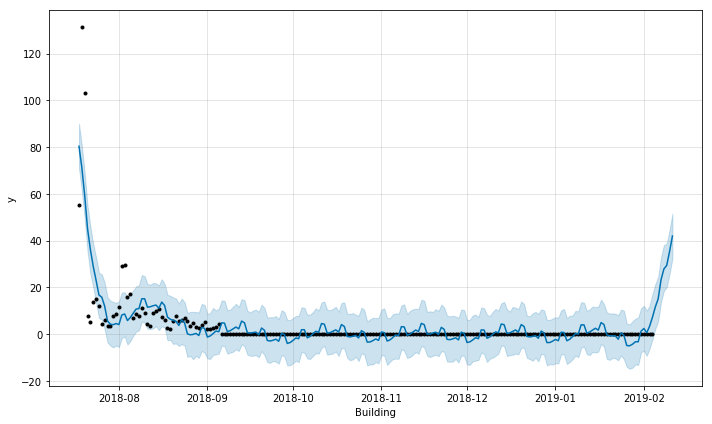

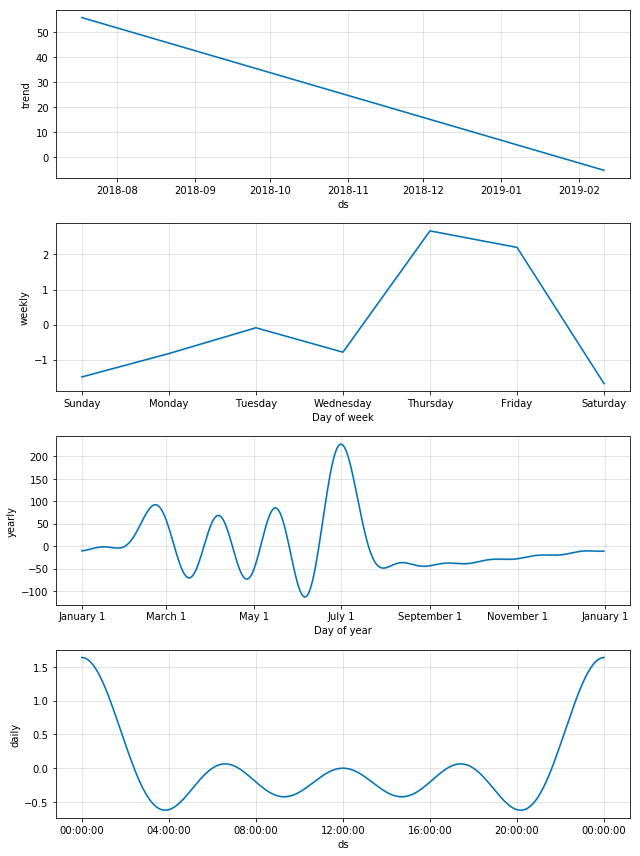

In [7]:
display(w)
w.observe(prophet_forecast)